# **IMPORTS**



In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# **WORKING WITH THE MNIST DATASET**

In [ ]:
path = "/content/mnist_train.csv"

In [ ]:
data = pd.read_csv(path)

In [ ]:
print("Shape of data : ", data.shape)
# There are 21791 examples with 785 colums 1 for lables 784 = 28 * 28 for image representation

Shape of data :  (60000, 785)


In [ ]:
print("First 5 rows of data : ")
data.head()
# It is observed that label is our y_train and other columns are our image pixel activations

First 5 rows of data : 


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Some info about the data : ")
data.info()

Some info about the data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
print("Description of data : ")
data.describe()

Description of data : 


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
data.isnull().sum()
# There are some null value in dataset we can fill them with zero activation

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
data.fillna(0,inplace = True)

In [ ]:
print("Coloumns of dataset are : ")
print(data.columns)

Coloumns of dataset are : 
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [ ]:
# Looking at an image from the data set
def see_image_1D(ax,i):
  ax.imshow(data.iloc[i,1:].values.reshape(28,28,-1),cmap = 'gray')
  ax.set_title(data.iloc[i,0])
  ax.axis('off')

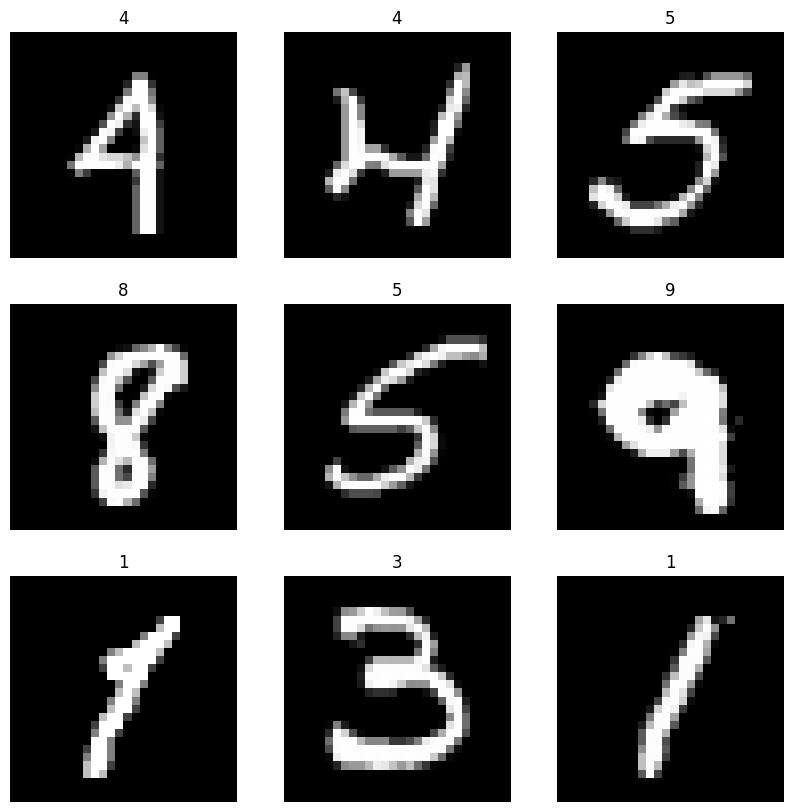

In [ ]:
# Seeing some of the plots from the image helps us see what we are working with
fig,ax = plt.subplots(3,3,figsize=(10,10))
ax = ax.flatten()
for index in range(9):
  i = np.random.randint(0,data.shape[0])
  see_image_1D(ax[index],i)

# **PREPROCESSING OUR DATA**

In [ ]:
# Splitting our data into X and y values to pass into our CNN model

X = data.iloc[:,1:] # All values except labels
y = data.iloc[:,0] # labels only

In [ ]:
print("Shape of X : ",X.shape)
print("Shape of y : ",y.shape)

Shape of X :  (60000, 784)
Shape of y :  (60000,)


In [ ]:
# We need to change the shape of X to (28,28,1) to pass it into the model since it requires a 2D shape
# for filters from conv2D layer and MaxPooling2D  to work on

X = X.values.reshape(-1,28,28,1)

In [ ]:
# Normalization of x values
# Since the neural network model requires inputs between 0 and 1
# we need to normalize these values to fit in range [0,1]

X = X/255.0


In [ ]:
# y needs to be changed into a categorical variable
# a categorical valiable of y = [1,0,2] would be [[0,1,0],[1,0,0],[0,0,1]]

# This needs to be performed since a singular output would not match with our loss function and
# proper training of our modl

y_hot = to_categorical(y)

In [ ]:
def see_image_2D(ax,i):
  ax.imshow(X[i]*255.0,cmap = 'gray')
  ax.set_title(y[i])
  ax.axis('off')

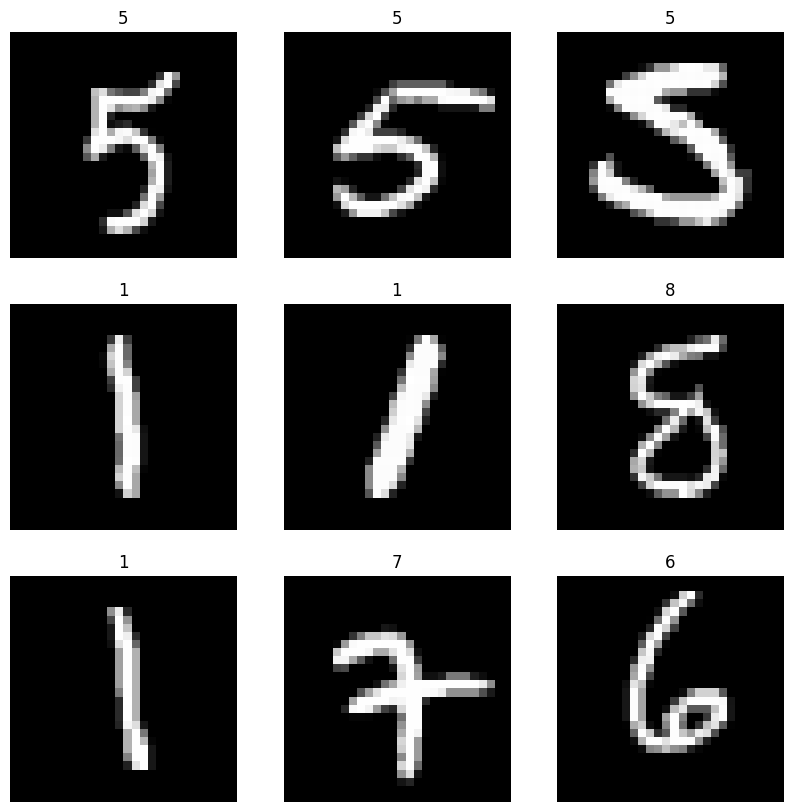

In [ ]:
# Seeing image after preprocessing
fig,ax = plt.subplots(3,3,figsize=(10,10))
ax = ax.flatten()
for index in range(9):
  i = np.random.randint(0,data.shape[0])
  see_image_2D(ax[index],i)

In [ ]:
print("Shape of X : ",X.shape)
print("Shape of y : ",y_hot.shape)

Shape of X :  (60000, 28, 28, 1)
Shape of y :  (60000, 10)


In [ ]:
# Splitting X and y into training and testing splits
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.2, random_state=0)
# This code shuffels the values and randomly places them into X_train ang X_test along with y_train and y_test

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


In [ ]:
# <--- With this our preprocessing of data ends --->

# **CREATING OUR MODEL**

In [ ]:
# Using Sequential() we create a linearly layered model
# where output of one layer becomes the input for another layer
model = Sequential()

# A convolution layer has multiple filters (32 in this case) these filters are of a fixed size (3,3)
# they move accross an image and find the pixels which produce an high activation
# each filter created and activation map and output is the same activation map stacked for
# outputs from the number of filters

# If the input is height , weight ,1
# output size is  height - filter_size + 1, weight - filter_size + 1 , no_of_filters
# and the parameters are number of parameters are filter_size*filter_size*number of filters

# ReLU activation for pixel value x is the maximum of x and 0, this avoids sparce activations
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation = 'relu'))

# A Dropout layer is a regulation layer which randomly drops some of the neurons activated
# this layer is added to reduce overfitting

model.add(Dropout(0.25))

# A max pooling layer moves a 2D window accross the entire image ((2,2) in this case) and returns the
# maximum activation find inside that layer this reduces computational complexity and allows
# a better fit on the dataset

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(5,5),activation = 'relu'))
model.add(Conv2D(8,(5,5),activation = 'relu'))

# To switch from convolution to dense layer we need to add a flatten layer which converts a 2Dimage into 1D
# for dense layer to act on

model.add(Flatten())

# Dense layer - A fully connected layer in which every neuron is connected to a previous layers neurons
# it computes the weights and biases for every neuron and outputs y = F(wx + b) w is weight and b is bias

# softmax activation for i inputs is ai = e^xi/ summation(e^xi) where xi is in vector x
# the maximum activation is our output

model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [ ]:
# Compiling the model with an optimizer and loss function is required before fitting it into a dataset

# Adam is an adaptive learning optimizer and combines the idea of momentum and adaptive learning
# ADAM = ADAptive Momentum

# loss = - summation over all i(log of yi)
# this loss dictates the change produced by adam

model.compile(loss = "categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

# **LOOKING AT OUTPUTS FROM EACH LAYER**

In [ ]:
i = np.random.randint(0,X_train.shape[0])
image = X_train[i]
label = y_train[i]

In [ ]:
# only one filter is passed
conv_layer_1 = Conv2D(1,(3,3),activation = 'relu',input_shape=(28,28,1))
#Creating a dropout layer
drop_layer = Dropout(0.25)
#Creating a maxpool layer
max_pool_layer = MaxPooling2D(2,2)

(-0.5, 12.5, 12.5, -0.5)

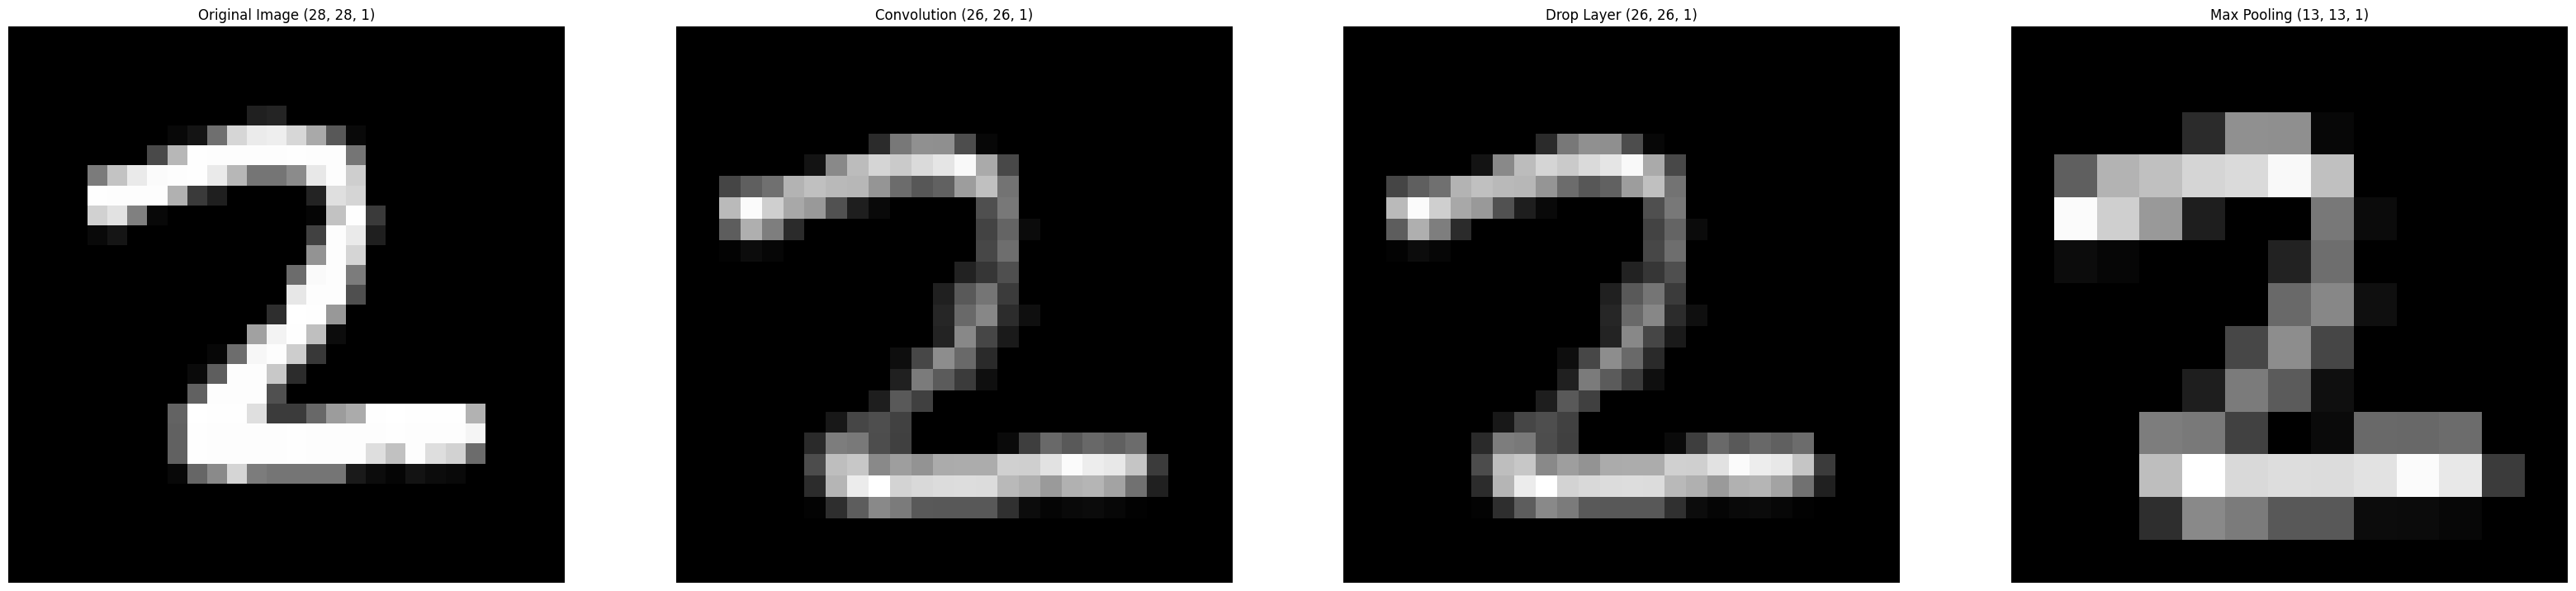

In [ ]:
# Passing image to convolution layer to get a output
output = conv_layer_1(image.reshape(1,28,28,1))
# Converting to a nparray
output_array = output.numpy()
# Squeezing to reduce the shape
output_array = np.squeeze(output_array, axis=0)
#Passing convlayer output to dropout later
drop_layer_output = drop_layer(output)
# Converting to a nparray
output_array_2 = drop_layer_output.numpy()
# Squeezing to reduce the shape
output_array_2 = np.squeeze(output_array_2, axis=0)
#Passing dropout output to max pooling layer
max_pool_output = max_pool_layer(drop_layer_output)
# Converting to a nparray
output_array_3 = max_pool_output.numpy()
# Squeezing to reduce the shape
output_array_3 = np.squeeze(output_array_3, axis=0)
#Plotting these images
fig, axes = plt.subplots(1, 4, figsize=(40, 20))
axes.flatten()
axes[0].imshow(image,cmap='gray')
axes[0].set_title('Original Image {}'.format(image.shape))
axes[0].axis('off')
axes[1].imshow(output_array, cmap='gray')
axes[1].set_title('Convolution {}'.format(output_array.shape))
axes[1].axis('off')
axes[2].imshow(output_array_2, cmap='gray')
axes[2].set_title('Drop Layer {}'.format(output_array_2.shape))
axes[2].axis('off')
axes[3].imshow(output_array_3, cmap='gray')
axes[3].set_title('Max Pooling {}'.format(output_array_3.shape))
axes[3].axis('off')

# Output would be a stacking of multiple such convolution layers in a 3D shape
# For plotting we only passed one filter

In [ ]:
flatter = Flatten()
# Adding a flatten layer to dense layer output
max_pool_output_flat = flatter(max_pool_output)
print("Flatten layer output : ",max_pool_output_flat)
print("Flatten layer output shape : ",max_pool_output_flat.shape)
dense_output = Dense(10,activation = 'softmax')(max_pool_output_flat)
# adding a dense layer to flatten layer output
print("Dense layer output : ", dense_output)
print("Dense layer output shape : ", dense_output.shape)

Flatten layer output :  tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.22557563 0.7482829  0.7426863  0.03768152 0.         0.
  0.         0.         0.         0.         0.4949628  0.93946123
  1.0010921  1.1076593  1.1353166  1.2951651  0.99716175 0.
  0.         0.         0.         0.         0.         1.3072853
  1.0751016  0.79858196 0.15859818 0.         0.         0.625908
  0.06067735 0.         0.         0.         0.         0.
  0.06285131 0.03631641 0.         0.         0.         0.18013823
  0.57235587 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.5492719  0.70601404 0.08119357 0.         0.         0.
  0.         0.         0.         0

# **TRAINING OUR MODEL**

In [ ]:
hist = model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
600/600 [==============================] - 183s 298ms/step - loss: 0.3220 - accuracy: 0.9008 - val_loss: 0.1107 - val_accuracy: 0.9719
Epoch 2/5
600/600 [==============================] - 146s 243ms/step - loss: 0.0872 - accuracy: 0.9733 - val_loss: 0.0707 - val_accuracy: 0.9803
Epoch 3/5
600/600 [==============================] - 151s 251ms/step - loss: 0.0632 - accuracy: 0.9808 - val_loss: 0.0601 - val_accuracy: 0.9832
Epoch 4/5
600/600 [==============================] - 140s 233ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0521 - val_accuracy: 0.9839
Epoch 5/5
600/600 [==============================] - 162s 270ms/step - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.0585 - val_accuracy: 0.9818


In [ ]:
h = hist.history

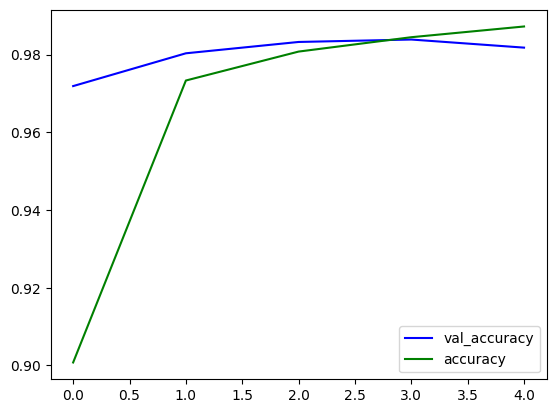

In [ ]:
# Plotting the accuracy vs validation set accuracy
h = hist.history
plt.plot(h['val_accuracy'],color = 'blue')
plt.plot(h['accuracy'],color = 'green')
plt.legend(['val_accuracy','accuracy'])
plt.show()

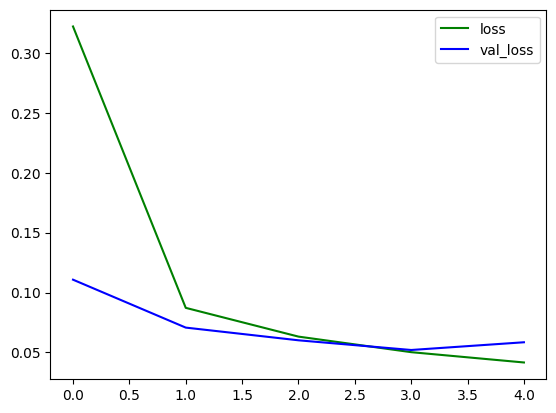

In [ ]:
# Plotting the loss vs validation set loss
plt.plot(h['loss'],color = 'green')
plt.plot(h['val_loss'],color = 'blue')
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
# Predicting values of our X_test
y_pred = model.predict(X_test)

375/375 [==============================] - 9s 23ms/step


In [ ]:
y_pred.shape

(12000, 10)

In [ ]:
# Converting y_test back to origional labels
df_test = pd.DataFrame(y_test)
y_test = df_test.idxmax(axis=1)

In [ ]:
# Converting y_pred to get labels
df_pred = pd.DataFrame(y_pred)
y_pred = df_pred.idxmax(axis=1)

In [ ]:
print(y_pred)

0        3
1        6
2        6
3        6
4        0
        ..
11995    7
11996    6
11997    5
11998    1
11999    6
Length: 12000, dtype: int64


In [ ]:
# Counting the number of misclassifications
cnt =0
for i in range(y_test.shape[0]):
  if y_test[i] != y_pred[i]:
    cnt+=1
print("Number of misclassifications : ",cnt)
print("Accuracy : ", ((y_test.shape[0]-cnt)/y_test.shape[0])*100)

Number of misclassifications :  180
Accuracy :  98.5
